In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras import regularizers



# Load the dataset (replace the path with your actual file path)
df = pd.read_csv('../../data/alzheimers_disease_data.csv')

# Preview the dataset
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [28]:
# Check for missing values
df.isnull().sum()


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [29]:
# convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [30]:
X = df.drop(columns=['Diagnosis'])  # Assuming 'Diagnosis' is the target column
y = df['Diagnosis']

In [31]:
X.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale the features for better performance (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(weights))



## NN MODEL

In [36]:
model = Sequential()

model.add(Dense(
    64,
    activation='relu',
    input_dim=X_train.shape[1],
    kernel_regularizer=regularizers.l2(1e-4)
))
model.add(Dropout(0.3))

model.add(Dense(
    32,
    activation='relu',
    kernel_regularizer=regularizers.l2(1e-4)
))
model.add(Dropout(0.3))

model.add(Dense(
    32,
    activation='relu',
    kernel_regularizer=regularizers.l2(1e-4)
))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))


/home/swapnil/COURSE-PROJECTS/DSP-PROJECT/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [39]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5346 - loss: 0.7268 - val_accuracy: 0.6651 - val_loss: 0.6512
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.6664 - val_accuracy: 0.7419 - val_loss: 0.6046
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.6129 - val_accuracy: 0.8070 - val_loss: 0.5224
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.5609 - val_accuracy: 0.8000 - val_loss: 0.4864
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.5108 - val_accuracy: 0.8000 - val_loss: 0.4557
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4743 - val_accuracy: 0.8000 - val_loss: 0.4382
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4607 - val_accuracy: 0.8116 - val_loss: 0.4303
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.4444 - val_accuracy: 0.8163 - val_loss:

## Model evaluation

In [40]:
y_pred = model.predict(X_test)
y_pred_bin = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_bin)
cm = confusion_matrix(y_test, y_pred_bin)
report = classification_report(y_test, y_pred_bin)

print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Final Accuracy: 83.72%

Confusion Matrix:
[[237  40]
 [ 30 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       277
           1       0.75      0.80      0.78       153

    accuracy                           0.84       430
   macro avg       0.82      0.83      0.82       430
weighted avg       0.84      0.84      0.84       430



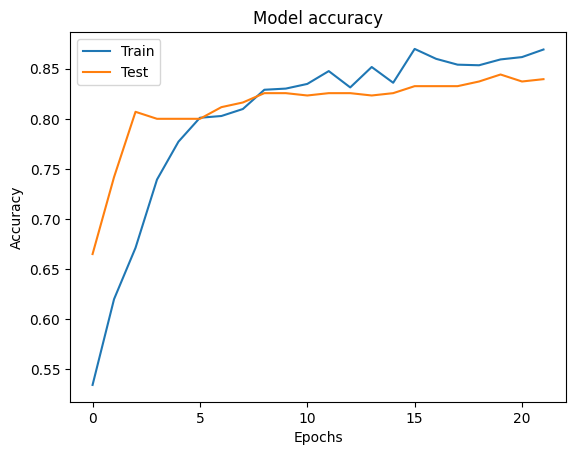

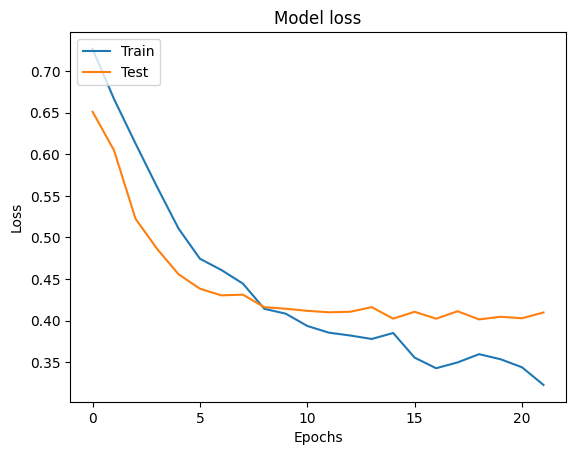

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [43]:
import joblib

# Save the Keras model
model.save("nn_model.h5")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [45]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)  # This gives probabilities (0 to 1)

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC-AUC Score: 0.9050


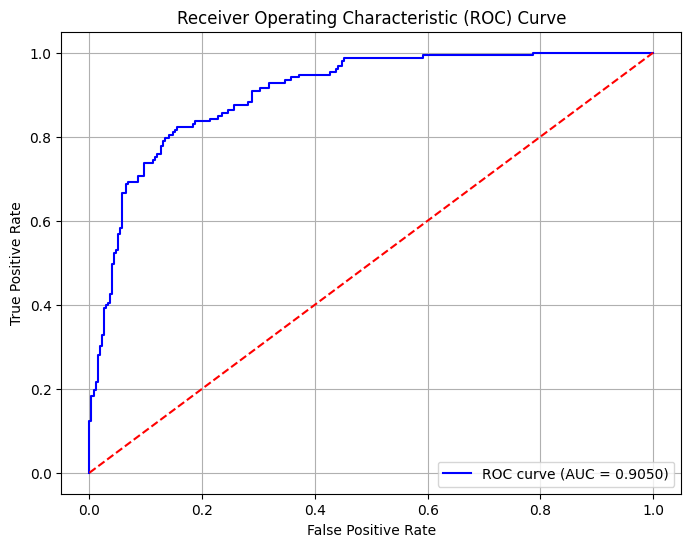

In [46]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
